## task:
### predict the price of a house
### use: Linear Regression + regularization

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import dill

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics.cluster import contingency_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer, make_column_selector, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

pd.set_option('display.max_columns', 30)

## data analysis

In [2]:
sales = pd.read_csv('5.5 data.csv')
sales

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,Foundation,TotalBsmtSF,TotalBsmtSF_M,Heating,HeatingQC,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,PConc,856,79.524968,GasA,Ex,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,CBlock,1262,117.243586,GasA,Ex,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,PConc,920,85.470760,GasA,Ex,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,BrkTil,756,70.234668,GasA,Gd,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,PConc,1145,106.373935,GasA,Ex,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,PConc,953,88.536559,GasA,Ex,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,CBlock,1542,143.256426,GasA,TA,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,Stone,1152,107.024256,GasA,Ex,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,CBlock,1078,100.149434,GasA,Gd,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

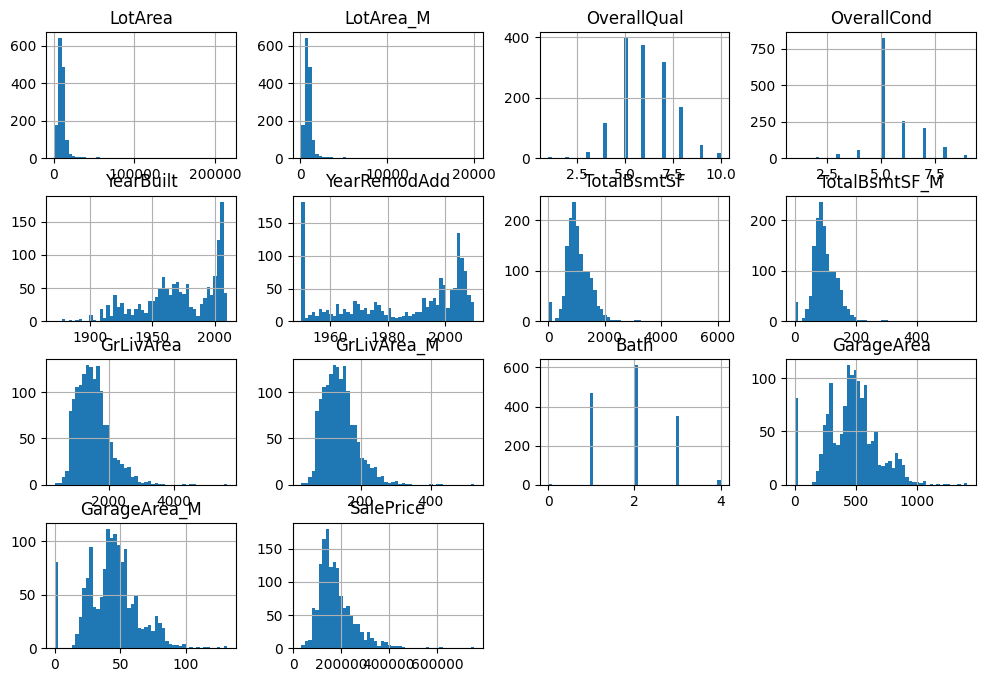

In [4]:
sales.hist(bins=50, figsize=(12, 8));

In [5]:
sales.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


In [6]:
sales[sales.describe().columns].corr()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


<Axes: >

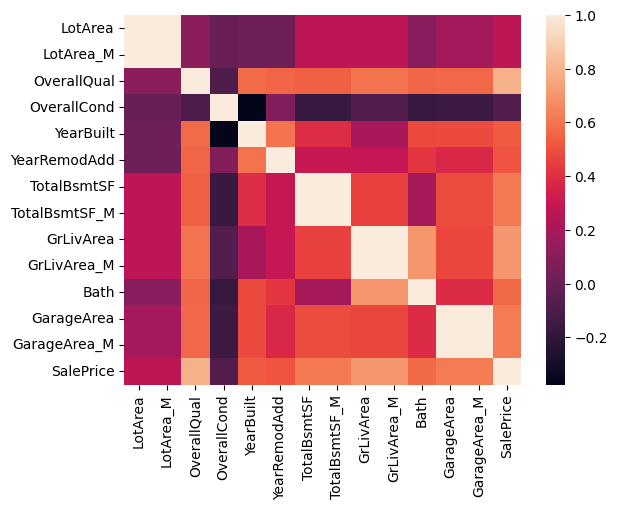

In [7]:
sns.heatmap(sales[sales.describe().columns].corr(), annot=False)

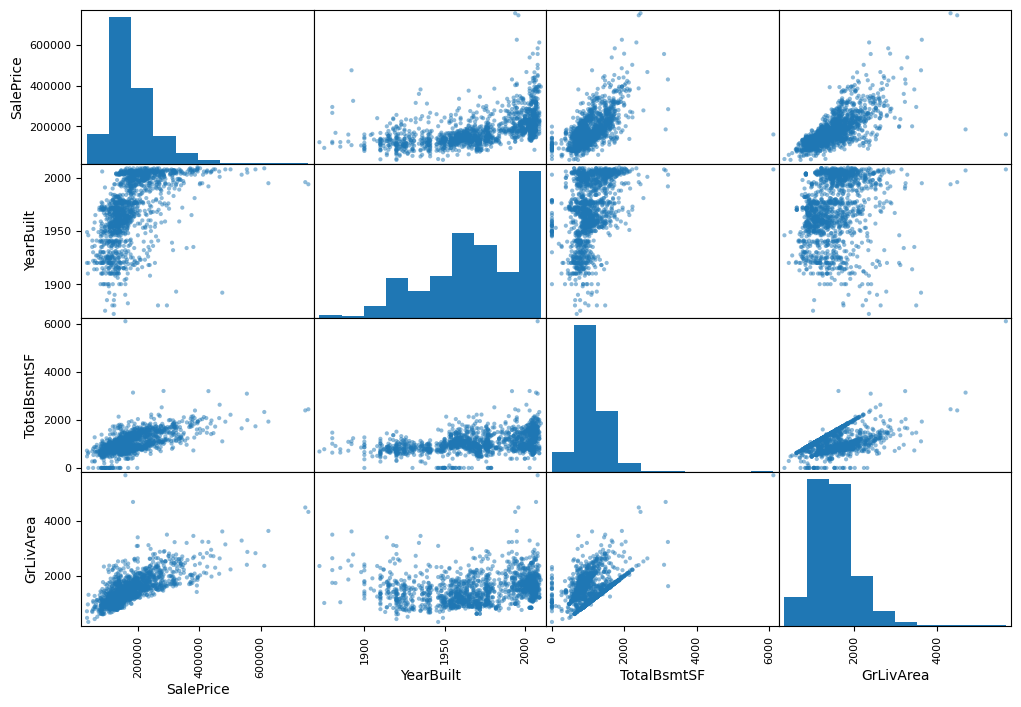

In [9]:
scatter_matrix(sales[['SalePrice','YearBuilt','TotalBsmtSF','GrLivArea']], figsize=(12, 8));

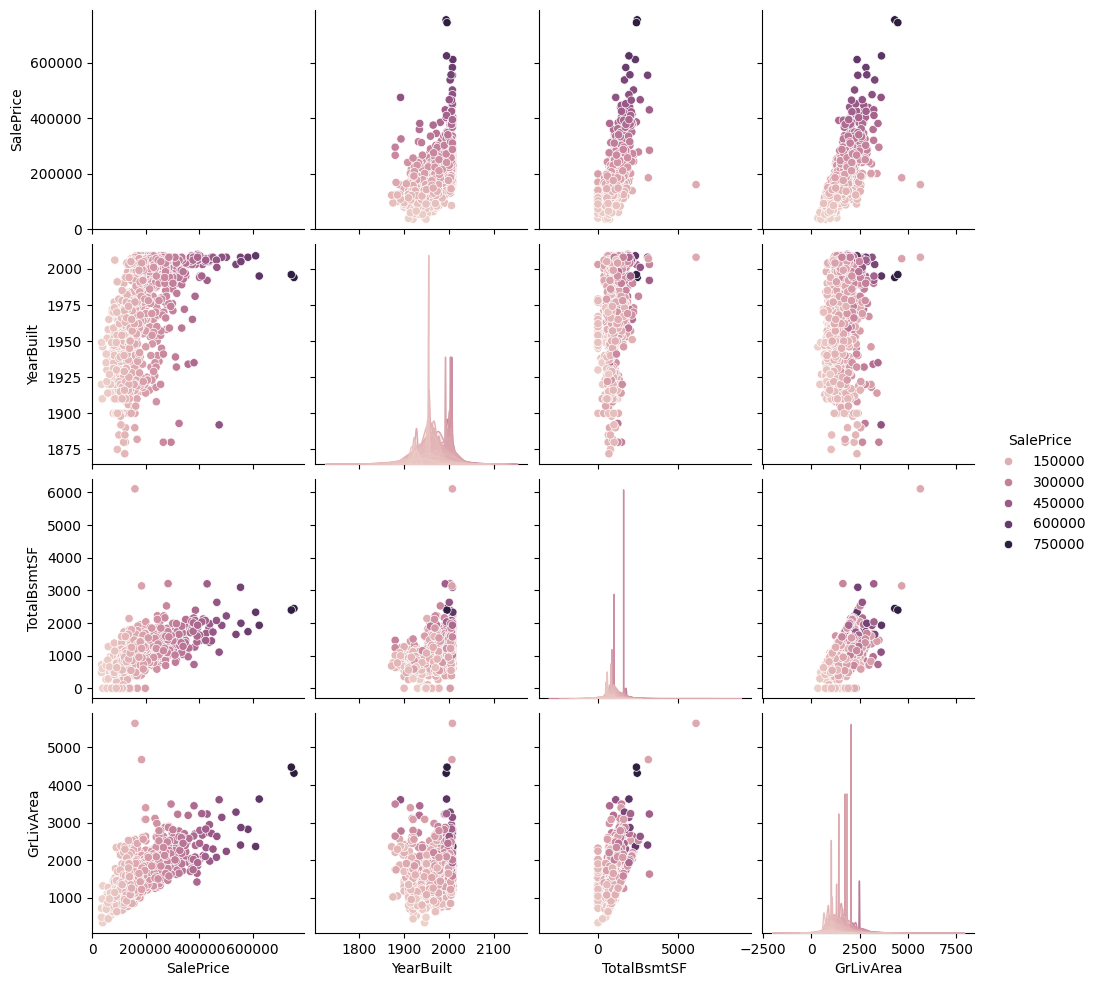

In [10]:
sns.pairplot(sales[['SalePrice','YearBuilt','TotalBsmtSF','GrLivArea']], 
             vars=['SalePrice','YearBuilt','TotalBsmtSF','GrLivArea'], hue='SalePrice')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(sales.drop('SalePrice', axis=1), sales['SalePrice'], random_state=81, test_size=0.3)

In [15]:
cat_columns = ['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond',
               'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
               'SaleCondition']

## pipeline preprocessing

In [16]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def transform_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def transform_name2(function_transformer, feature_names_in):
    return ['month','year']  # feature names out

def month_year(X):
    return X.iloc[:, 0].str.rsplit("/", n=-1, expand=True).astype('category')
 
ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, feature_names_out=transform_name),
    StandardScaler(),
)

default_cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler(),
)

month_year_pipeline = make_pipeline(
    FunctionTransformer(month_year, feature_names_out=transform_name2),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
)

preprocessing = ColumnTransformer([
    ('month_year', month_year_pipeline, ['DateSold']),
    ('bath_to_live', ratio_pipeline, ['Bath','GrLivArea']),
    ('category', default_cat_pipeline, cat_columns),
    ('tails', log_pipeline, ['LotArea','TotalBsmtSF','GrLivArea','GarageArea']),
    ('minmax', MinMaxScaler(), ['YearBuilt','YearRemodAdd']),
    ('standard', StandardScaler(), ['OverallQual','OverallCond','Bath','GrLivArea']),
],
remainder='drop')

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('target', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)),
])

## without regularization:

In [18]:
model = full_pipeline.fit(X_train, y_train)

In [19]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [20]:
train_mae = mean_absolute_error(y_train, y_predict_train)
test_mae = mean_absolute_error(y_test, y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 18002.26056937185
Test MAE: 19669.84903269564


In [21]:
train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1009829810.3337522
Test MSE: 2185715092.506712


In [22]:
train_mse = r2_score(y_train, y_predict_train)
test_mse = r2_score(y_test, y_predict_test)
print("Train r2: {}".format(train_mse))
print("Test r2: {}".format(test_mse))

Train r2: 0.8388917052335724
Test r2: 0.6582916437099472


## Lasso

In [23]:
c1 = range(-5,2)
param_lasso = {'target__regressor': [Lasso(random_state=42)],
         'target__regressor__alpha': [10**i for i in c1],
        }
grid_search = GridSearchCV(full_pipeline, param_lasso, cv=5, scoring='neg_root_mean_squared_error')
model_lasso = grid_search.fit(X_train, y_train)

In [24]:
y_predict_train_lasso = model_lasso.predict(X_train)
y_predict_test_lasso = model_lasso.predict(X_test)

In [25]:
train_mae_lasso = mean_absolute_error(y_train, y_predict_train_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_predict_test_lasso)
print("Train MAE: {}".format(train_mae_lasso))
print("Test MAE: {}".format(test_mae_lasso))

Train MAE: 18297.126728233336
Test MAE: 19508.85154105192


In [26]:
train_mse_lasso = mean_squared_error(y_train, y_predict_train_lasso)
test_mse_lasso = mean_squared_error(y_test, y_predict_test_lasso)
print("Train MSE: {}".format(train_mse_lasso))
print("Test MSE: {}".format(test_mse_lasso))

Train MSE: 1022797026.3972123
Test MSE: 1877684715.0530186


In [27]:
train_mse_lasso = r2_score(y_train, y_predict_train_lasso)
test_mse_lasso = r2_score(y_test, y_predict_test_lasso)
print("Train r2: {}".format(train_mse_lasso))
print("Test r2: {}".format(test_mse_lasso))

Train r2: 0.8368229149815185
Test r2: 0.7064482192526413


In [28]:
model_lasso.best_params_

{'target__regressor': Lasso(random_state=42),
 'target__regressor__alpha': 0.001}

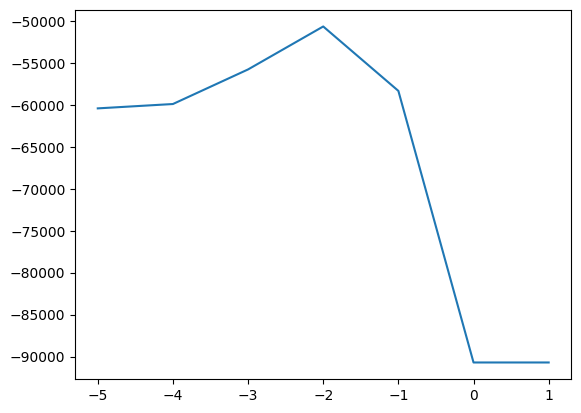

In [29]:
plt.plot(c1, model_lasso.cv_results_['split0_test_score']);

## Ridge

In [30]:
c2 = range(-2,5)
param_ridge = {'target__regressor': [Ridge(random_state=42)],
         'target__regressor__alpha': [10**i for i in c2],
        }
grid_search = GridSearchCV(full_pipeline, param_ridge, cv=5, scoring='neg_root_mean_squared_error')
model_ridge = grid_search.fit(X_train, y_train)

In [31]:
y_predict_train_ridge = model_ridge.predict(X_train)
y_predict_test_ridge = model_ridge.predict(X_test)

In [32]:
train_mae_ridge = mean_absolute_error(y_train, y_predict_train_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_predict_test_ridge)
print("Train MAE: {}".format(train_mae_ridge))
print("Test MAE: {}".format(test_mae_ridge))

Train MAE: 18269.068183911942
Test MAE: 19801.940057408367


In [33]:
train_mse_ridge = mean_squared_error(y_train, y_predict_train_ridge)
test_mse_ridge = mean_squared_error(y_test, y_predict_test_ridge)
print("Train MSE: {}".format(train_mse_ridge))
print("Test MSE: {}".format(test_mse_ridge))

Train MSE: 1020310929.6626416
Test MSE: 2024894477.255812


In [34]:
train_mse_ridge = r2_score(y_train, y_predict_train_ridge)
test_mse_ridge = r2_score(y_test, y_predict_test_ridge)
print("Train r2: {}".format(train_mse_ridge))
print("Test r2: {}".format(test_mse_ridge))

Train r2: 0.8372195469698321
Test r2: 0.6834338721199252


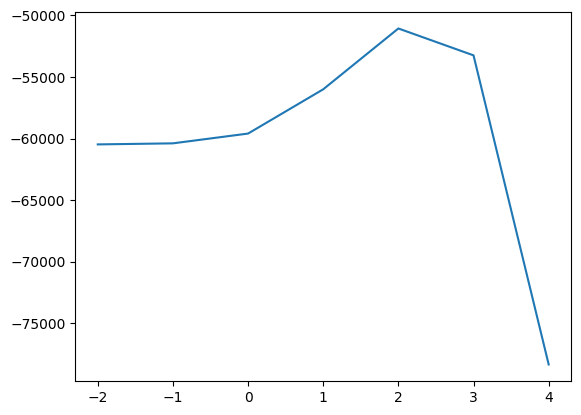

In [35]:
plt.plot(c2, model_ridge.cv_results_['split0_test_score']);

## final pipeline Ridge

In [36]:
full_pipeline_ridge = full_pipeline.set_params(target=Ridge(alpha=100))
full_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('month_year',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function transform_name2 at 0x15d48e160>,
                                                                                       func=<function month_year at 0x15d48c0e0>)),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['DateSold']),
                                                 ('bath_to_live',
                                                  Pipel...
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'TotalBsmtSF',
                                                   'GrLivArea', 'GarageArea']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('standard', StandardScaler(),
                                                  ['OverallQual', 'OverallCond',
                                                   'Bath', 'GrLivArea'])])),
                ('target', Ridge(alpha=100))])

### feature importance

In [37]:
d6_1 = pd.DataFrame({1: full_pipeline_ridge['preprocessing'].get_feature_names_out(),
                    2: full_pipeline_ridge.named_steps['target'].coef_})
d6_1.sort_values(by=[2]).tail(3)

,1,2
59,category__KitchenQual_Ex,15844.495712
78,standard__GrLivArea,19142.483912
75,standard__OverallQual,24943.219167


In [38]:
d6_1.sort_values(by=[2]).head(3)

,1,2
62,category__KitchenQual_TA,-9438.419158
34,category__ExterQual_TA,-9263.964517
40,category__Foundation_BrkTil,-6163.441634


## final pipeline Lasso

In [39]:
full_pipeline_lasso = full_pipeline.set_params(target=Lasso(alpha=0.01))
full_pipeline_lasso.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+11, tolerance: 6.406e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('month_year',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function transform_name2 at 0x15d48e160>,
                                                                                       func=<function month_year at 0x15d48c0e0>)),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['DateSold']),
                                                 ('bath_to_live',
                                                  Pipel...
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'TotalBsmtSF',
                                                   'GrLivArea', 'GarageArea']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('standard', StandardScaler(),
                                                  ['OverallQual', 'OverallCond',
                                                   'Bath', 'GrLivArea'])])),
                ('target', Lasso(alpha=0.01))])

### feature importance

In [41]:
d6_2 = pd.DataFrame({1: full_pipeline_lasso['preprocessing'].get_feature_names_out(),
                    2: full_pipeline_lasso.named_steps['target'].coef_})
d6_2[(d6_2[2] < 0.1) & (d6_2[2] > -0.1)]

,1,2
19,category__Street_Pave,6.102601e-09
39,category__ExterCond_TA,0.000000e+00
58,category__CentralAir_Y,0.000000e+00
